# 0908-Process-VOC-Data

There are two raw PASCAL-VOC-format dataset contains images and xml annotations, one is AC dataset, one is SVHN <br>
In this project, all VOC-format data are stored in VOC-devkit folder, they are stored in different year's folder

In [ ]:
# Extract given dataset
import zipfile as zf
files = zf.ZipFile("VOCdevkit.zip", 'r')
files.extractall('')
files.close()

AC and SVHN are custom prepared VOC dataset, the folder structures in PASCAL VOC format<br>
AC dataset are stored in VOC2007, VOC2012 folders (train,val)<br>
SVHN is stored in VOC2015, VOC2017 folders (train, test)<br>

### AC fixing xml  annotations 2007+2012

In the AC dataset, the xml annotations is not strictly in the PASCAL VOC annotation format, this may cause dataset loading failure, we will modify the xml annotations we have into PASCAL VOC annotation format

In [7]:
import xml.etree.ElementTree as ET
import os

# Select which folder: uncomment one of year name
VOCyear = "VOC2007"
# VOCyear = "VOC2012"
  
directory = 'VOCdevkit/{}/Annotations/'.format(VOCyear)

print('fixing...')

# looping annotations file
for filename in os.listdir(directory):
    if filename.endswith(".xml"):
        tree = ET.parse('VOCdevkit/{}/Annotations/{}'.format(VOCyear,filename))
        root = tree.getroot()

        # fix folder
        folder = root.find('folder')
        new_folder = VOCyear
        folder.text = str(new_folder)
        folder.set('updated', 'yes')

        #fix source
        source = root.find('source')
        database = source.find('database')
        new_database = "The {} Database".format(VOCyear)
        database.text = str(new_database)
        database.set('updated', 'yes')


        # remove path
        for path in root.findall('path'):
            root.remove(path)

        tree.write('VOCdevkit/{}/Annotations/{}'.format(VOCyear, filename))
        
        for object in doc.findall('object'):
            object.findall('name')
        
    else:
        print("somthing wrong")
        continue    
print("Completed")

fixing...
Completed


### AC plot number data distibution

Plot how many time each digits are labeled

<AxesSubplot:>

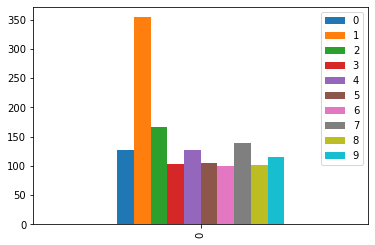

In [23]:
import xml.etree.ElementTree as ET
import os

import pandas
from collections import Counter

ac_num_obj_list = []

# Select which folder: uncomment one of year name
VOCyear = "VOC2007"
# VOCyear = "VOC2012"
  
directory = 'VOCdevkit/{}/Annotations/'.format(VOCyear)

for filename in os.listdir(directory):
    if filename.endswith(".xml"):
        tree = ET.parse('VOCdevkit/{}/Annotations/{}'.format(VOCyear,filename))
        root = tree.getroot()
        
        for name in root.iter('name'):
            ac_num_obj_list.append(name.text)      
        
    else:
        print("somthing wrong")
        continue    
        
ac_counts = Counter(ac_num_obj_list)
df = pandas.DataFrame.from_dict(ac_counts, orient='index').transpose()[['0','1','2','3','4','5','6','7','8','9']]
df.plot(kind='bar')

### AC Generate train/validation spliting data (txt) 2007+2012

In Pascal-VOC dataset, training and validation data infomation are stored in a txt file under ImageSet folder, since we only have raw images and xml annotations, we need to generate this txt file

In [12]:
import os  
import random  
  
# Select which folder: uncomment one of year name
VOCyear = "VOC2007"
# VOCyear = "VOC2012"
    
# create train/validation sets
trainval_percent = 1    # trainval 
train_percent = 0.6      # train
xmlfilepath = 'VOCdevkit/{}/Annotations'.format(VOCyear)
txtsavepath = 'VOCdevkit/{}/ImageSets/Main'.format(VOCyear)
total_xml = os.listdir(xmlfilepath)  

# define neccessary vairables
num=len(total_xml)  
list=range(num)  
tv=int(num*trainval_percent)  
tr=int(tv*train_percent)  
trainval= random.sample(list,tv)  
train=random.sample(trainval,tr)  

# record sets' info in txt files under ImageSets folder
ftrainval = open('VOCdevkit/{}/ImageSets/Main/trainval.txt'.format(VOCyear), 'w')  
ftest = open('VOCdevkit/{}/ImageSets/Main/test.txt'.format(VOCyear), 'w')  
ftrain = open('VOCdevkit/{}/ImageSets/Main/train.txt'.format(VOCyear), 'w')  
fval = open('VOCdevkit/{}/ImageSets/Main/val.txt'.format(VOCyear), 'w')  
  
for i  in list:  
    name=total_xml[i][:-4]+'\n'  
    if i in trainval:  
        ftrainval.write(name)  
        if i in train:  
            ftrain.write(name)  
        else:  
            fval.write(name)  
    else:  
        ftest.write(name)  
  
ftrainval.close()  
ftrain.close()  
fval.close()  
ftest .close() 

print("total annotated image number: {}".format(num))

total annotated image number: 1070


### SVHN Changing images file name to .jpg format

The original SVHN dataset provides png image format, in VOC-format datset, images needs to be in jpg format, so we are changing SVHN imgs into jpg format

In [ ]:
from glob import glob
import cv2
import os

# Select which folder: uncomment one of year name
VOCyear = "VOC2015"
#VOCyear = "VOC2017"

pngs = glob('./VOCdevkit/{}/JPEGImages/*.png'.format(VOCyear))

for j in pngs:
    img = cv2.imread(j)
    cv2.imwrite(j[:-3] + 'jpg', img)

for j in pngs:
    os.remove(j)

### SHVN fixing xml  annotations 2015+2017

In the SHVN dataset, the xml annotations is not strictly in the PASCAL VOC annotation format, this may cause dataset loading failure, we will modify the xml annotations we have into PASCAL VOC annotation format

In [13]:
import xml.etree.ElementTree as ET
import os

# Select which folder: uncomment one of year name
VOCyear = "VOC2015"
# VOCyear = "VOC2017"

directory = './VOCdevkit/{}/Annotations/'.format(VOCyear)
count = 0

# looping annotations files
print('fixing...')
for filename in os.listdir(directory):

    if filename.endswith(".xml"):
        tree = ET.parse('./VOCdevkit/{}/Annotations/{}'.format(VOCyear,filename))
        root = tree.getroot()

        # fix filename
        name = root.find('filename')
        new_name = filename[:-3]+'jpg'
        name.text = str(new_name)
        name.set('updated', 'yes')
    
        # change class name "10" to "0"
        for name in root.iter('name'):
            if name.text == "10":
                name.text = "0"
                name.set('updated','yes')
            else:
                continue
        
        count = count+1
        
        tree.write('./VOCdevkit/{}/Annotations/{}'.format(VOCyear,filename))
        
    else:
        print("somthing wrong")
        continue
print("Completed")
print("fixed label : {}".format(count))

fixing...
Completed
fixed label : 13068


### SVHN plot number data distibution

Plot how many time each digits are labeled

<AxesSubplot:>

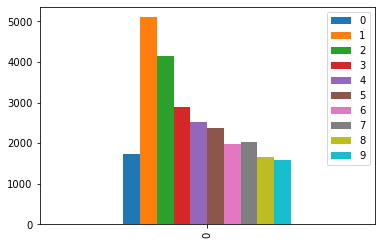

In [2]:
import xml.etree.ElementTree as ET
import os

import pandas
from collections import Counter

svhn_num_obj_list = []

# Select which folder: uncomment one of year name
VOCyear = "VOC2015"
#VOCyear = "VOC2017"
  
directory = 'VOCdevkit/{}/Annotations/'.format(VOCyear)

for filename in os.listdir(directory):
    if filename.endswith(".xml"):
        tree = ET.parse('VOCdevkit/{}/Annotations/{}'.format(VOCyear,filename))
        root = tree.getroot()
        
        for name in root.iter('name'):
            svhn_num_obj_list.append(name.text) 
#             print(name.text)
        
    else:
        print("somthing wrong")
        continue    

svhn_counts = Counter(svhn_num_obj_list)
# print(svhn_counts)
df = pandas.DataFrame.from_dict(svhn_counts, orient='index').transpose()[['0','1','2','3','4','5','6','7','8','9']]
df.plot(kind='bar')

### SHVN Generate train/validation spliting data (txt) 2007+2012

In Pascal-VOC dataset, training and validation data infomation are stored in a txt file under ImageSet folder, since we only have raw images and xml annotations, we need to generate this txt file

In [10]:
import os  
import random  

# Select which folder: uncomment one of year name
VOCyear = "VOC2015"
#VOCyear = "VOC2017"

# setting up training/validation set
trainval_percent = 1    # trainval
train_percent = 0.6      # train
xmlfilepath = 'VOCdevkit/{}/Annotations'.format(VOCyear)
txtsavepath = 'VOCdevkit/{}/ImageSets/Main'.format(VOCyear)
total_xml = os.listdir(xmlfilepath)  

# define neccessary vairables
num=len(total_xml)  
list=range(num)  
tv=int(num*trainval_percent)  
tr=int(tv*train_percent)  
trainval= random.sample(list,tv)  
train=random.sample(trainval,tr)  
  
# record sets' info in txt files under ImageSets folder
ftrainval = open('VOCdevkit/{}/ImageSets/Main/trainval.txt'.format(VOCyear), 'w')  
ftest = open('VOCdevkit/{}/ImageSets/Main/test.txt'.format(VOCyear), 'w')  
ftrain = open('VOCdevkit/{}/ImageSets/Main/train.txt'.format(VOCyear), 'w')  
fval = open('VOCdevkit/{}/ImageSets/Main/val.txt'.format(VOCyear), 'w')  
  
for i  in list:  
    name=total_xml[i][:-4]+'\n'  
    if i in trainval:  
        ftrainval.write(name)  
        if i in train:  
            ftrain.write(name)  
        else:  
            fval.write(name)  
    else:  
        ftest.write(name)  
  
ftrainval.close()  
ftrain.close()  
fval.close()  
ftest .close()

print("total annotated image number : {}".format(num))

total annotated image number : 13068


### Use this block to have a look on selected xml annotations

In [14]:
from xml.etree import ElementTree
import random

# Select which folder: uncomment one of year name
# VOCyear = 'VOC2007'
# VOCyear = 'VOC2012'
VOCyear = 'VOC2015'
# VOCyear = 'VOC2017'

# xml_index = ""

# randomly select 20 xmls annotation to display
for i in range(20):
    xml_index = random.randint(1, 13068)
    xmlname = '{}.xml'.format(xml_index)
    tree = ElementTree.parse("./VOCdevkit/{}/Annotations/{}".format(VOCyear,xmlname))
    print("xml annotation: {}".format(xmlname))
    ElementTree.dump(tree)

xml annotation: 7528.xml
<annotation>
  <filename updated="yes">7528.jpg</filename>
  <size>
    <width>142</width>
    <height>39</height>
    <depth>3</depth>
  </size>
  <object>
    <name>9</name>
    <bndbox>
      <xmin>90</xmin>
      <ymin>4</ymin>
      <xmax>114</xmax>
      <ymax>32</ymax>
    </bndbox>
  </object>
</annotation>
xml annotation: 6274.xml
<annotation>
  <filename updated="yes">6274.jpg</filename>
  <size>
    <width>136</width>
    <height>36</height>
    <depth>3</depth>
  </size>
  <object>
    <name>1</name>
    <bndbox>
      <xmin>25</xmin>
      <ymin>9</ymin>
      <xmax>33</xmax>
      <ymax>31</ymax>
    </bndbox>
  </object>
</annotation>
xml annotation: 8492.xml
<annotation>
  <filename updated="yes">8492.jpg</filename>
  <size>
    <width>388</width>
    <height>161</height>
    <depth>3</depth>
  </size>
  <object>
    <name>9</name>
    <bndbox>
      <xmin>180</xmin>
      <ymin>98</ymin>
      <xmax>204</xmax>
      <ymax>126</ymax>
    </bndbo